# Answer Question 4 (Patrick)

What characteristics are predictors for changes in life expectancy in a country over time?


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for now we don't have preprocessed data, so we use the raw data 
data_raw = pd.read_csv('data/processed/merged_data.csv')
data_raw.set_index(['Country','Year'], inplace=True)


In [71]:
# Income level unknown
# Delete this countries
#delcon = data_raw[(data_raw['Income Level']=='Unknown') | (data_raw['Income Level'].isnull())]['Country'].unique().tolist()
#delcon.append('Democratic People\'s Republic of Korea')
#delcon.append('Somalia')
#print(delcon)
#data = data_raw[~data_raw['Country'].isin(delcon)]
#data = data_raw[data_raw['Country'] == 'Somalia']


# do some quick processing so we can work with it 
df_data = data_raw
df_data.drop(columns=['Last Updated: 11/14/2018', 'Data from database: World Development Indicators', 'GNI, PPP (current international $)', 'GNI, Atlas method (current US$)','GNI per capita, PPP (current international $)'], inplace=True)
display(df_data)



Life expectancy at birth (years)  Both sexes  \
Country     Year                                                 
Afghanistan 2016                                          62.7   
            2015                                          63.2   
            2014                                          63.0   
            2013                                          62.7   
            2012                                          62.2   
            2011                                          61.7   
            2010                                          61.2   
            2009                                          60.7   
            2008                                          60.2   
            2007                                          59.6   
            2006                                          59.2   
            2005                                          58.9   
            2004                                          58.4   
            2003                                          58.0   
            2002                                          57.4   
            2001                                          56.5   
            2000                                          55.9   
Albania     2016                                          76.4   
            2015                                          76.1   
            2014                                          76.1   
            2013                                          75.7   
            2012                                          75.2   
            2011                                          75.1   
            2010                                          74.7   
            2009                                          74.4   
            2008                                          74.2   
            2007                                          74.1   
            2006                                          73.9   
            2005                                          73.5   
            2004                                          73.3   
...                                                        ...   
Zambia      2012                                          59.6   
            2011                                          58.6   
            2010                                          57.5   
            2009                                          56.0   
            2008                                          54.0   
            2007                                          51.6   
            2006                                          50.1   
            2005                                          48.8   
            2004                                          47.6   
            2003                                          46.4   
            2002                                          45.7   
            2001                                          45.0   
            2000                                          44.4   
Zimbabwe    2016                                          61.4   
            2015                                          60.8   
            2014                                          59.9   
            2013                                          58.6   
            2012                                          57.3   
            2011                                          55.5   
            2010                                          52.9   
            2009                                          50.6   
            2008                                          48.9   
            2007                                          47.4   
            2006                                          46.3   
            2005                                          45.5   
            2004                                          45.0   
            2003                                          44.9   
            2002                                          

# Correlations: 

We start by looking at cross-correlation of our time-series data per country. This should give us an first impression if some variables linearly correlate. 
We assume that all characteristics from a country at time t have some influence on the life expectancy at time t+x. Thus we try different shifted values to find the highest correlation by shifting the life expectancy up. (newer life exp. values with older values of country characteristic) 

In [72]:
# this helper creates a new dataframe with the shifted data
def create_lagged_df(df,lag=0,columns_to_shift = [] ):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x in columns_to_shift:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
        
    return df


['Life expectancy at birth (years)  Both sexes']


Life expectancy at birth (years)  Both sexes Income Level  \
Country Year                                                              
Austria 2010                                          80.6            H   
        2009                                          80.4            H   
        2008                                          80.6            H   
        2007                                          80.3            H   
        2006                                          80.1            H   
        2005                                          79.6            H   
        2004                                          79.6            H   
        2003                                          79.1            H   
        2002                                          79.0            H   
        2001                                          78.9            H   
        2000                                          78.4            H   

              GDP per Capita  Surface area (sq. km)  \
Country Year                                          
Austria 2010    46858.043273                83879.0   
        2009    47963.179402                83879.0   
        2008    51708.765754                83879.0   
        2007    46855.771745                    NaN   
        2006    40635.281816                    NaN   
        2005    38403.133877                    NaN   
        2004    36821.521468                    NaN   
        2003    32222.897241                    NaN   
        2002    26401.745456                    NaN   
        2001    24537.514263                    NaN   
        2000    24564.458295                83879.0   

              Prevalence of HIV, total (% of population ages 15-49)  \
Country Year                                                          
Austria 2010                                                0.1       
        2009                                                0.1       
        2008                                                0.1       
        2007                                                NaN       
        2006                                                NaN       
        2005                                                NaN       
        2004                                                NaN       
        2003                                                NaN       
        2002                                                NaN       
        2001                                                NaN       
        2000                                                0.1       

              Population, total  \
Country Year                      
Austria 2010          8363404.0   
        2009          8343323.0   
        2008          8321496.0   
        2007                NaN   
        2006                NaN   
        2005                NaN   
        2004                NaN   
        2003                NaN   
        2002                NaN   
        2001                NaN   
        2000          8011566.0   

              Population density (people per sq. km of land area)  \
Country Year                                                        
Austria 2010                                         101.287425     
        2009                                         101.035663     
        2008                                         100.771343     
        2007                                                NaN     
        2006                                                NaN     
        2005                                                NaN     
        2004                                                NaN     
        2003                                                NaN     
        2002                                                NaN     
        2001                                                NaN     
        2000                                          97.015815     

              PM2.5 air pollution, mean annu

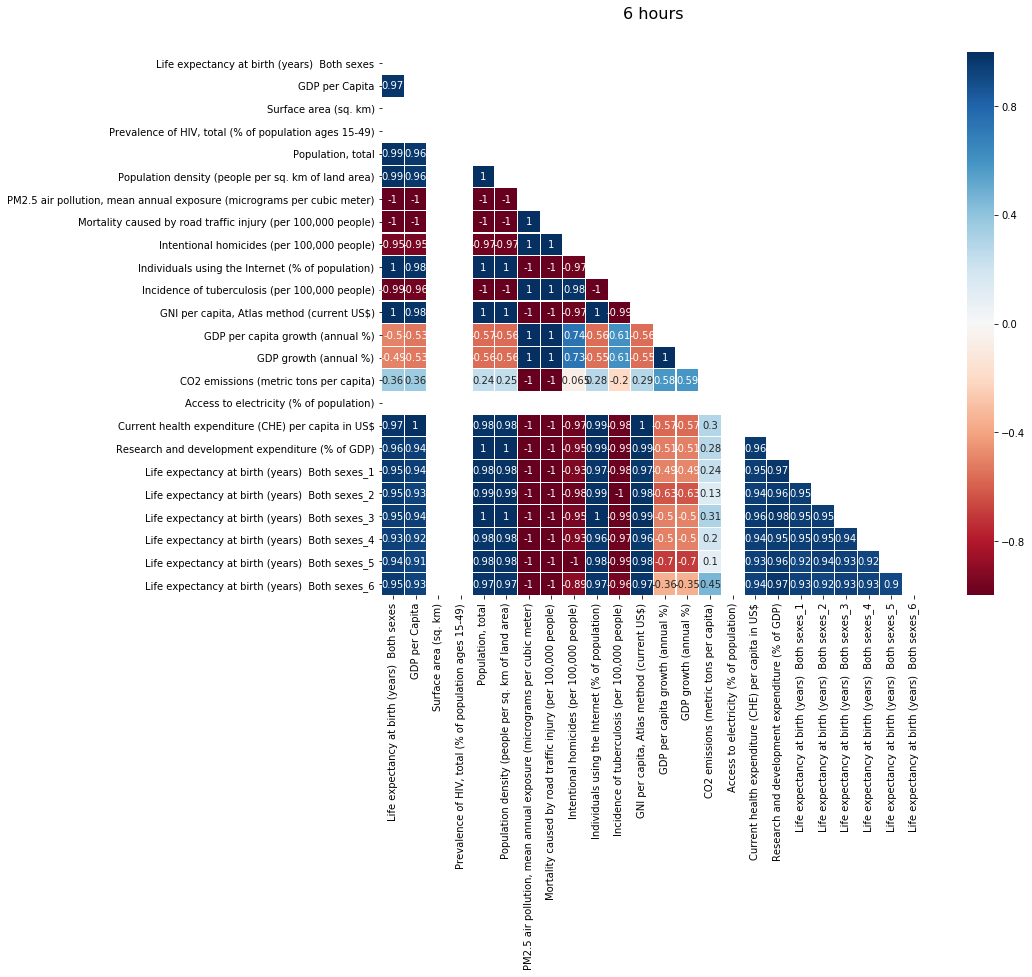

In [101]:


# let's have a look at correlation per country

df_data_country = df_data.groupby('Country')
df_austria = df_data_country.get_group('Afghanistan')
#display(df_data_country.get_group('Austria'))

def calculate_cross_correlation( data ):

    data = data.copy()
    #for now we just use Both Sex
    print(data.columns[:1].tolist())
    data.drop(data.columns[1:3].tolist(),axis=1,inplace=True)
    lag = 6 
    df_lagged = create_lagged_df(data, lag, data.columns[:1].tolist() )
    #since the first lagged rows are useless because they are NaN we need to drop them 
    df_lagged = df_lagged.iloc[lag:]
    display(df_lagged)

    ## now let calculate correlation 
    df_corr = df_lagged.corr()
    #display(df_corr)
   
    colormap = plt.cm.RdBu
    plt.figure(figsize=(15,10))
    plt.title(u'6 hours', y=1.05, size=16)

    mask = np.zeros_like(df_corr)
    mask[np.triu_indices_from(mask)] = True

    svm = sns.heatmap(df_corr, mask=mask, linewidths=0.1,vmax=1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True)
    
calculate_cross_correlation(df_austria)


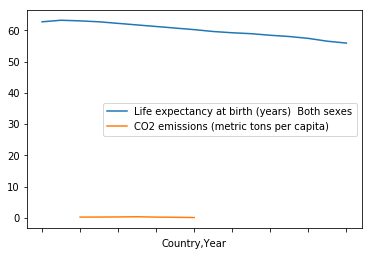

In [100]:


df_austria[df_austria.columns[[0,17]]].plot()



So just blindly calculating correlations and take good values as indicator for (higher) life. exp. is not a good idea. 
For example the CO2 emissions and Air polution __positivly__ correlate pretty good with the life exp., but would not make sense. Since this is not good for human, it actually should decrease the life exp.. 

But since such values also correlate with GDP, which also correlates with life. exp. again, we can conclude that more money for industry also cars ect. could mean more money for health which again increase age. 

So it's actually life exp. and CO2 emission correlating with GDP but not with eachother. 